In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode) #read in data

In [3]:
df.columns.values #print out all column names of original data

array(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET',
       'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE',
       'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE',
       'INSPECTION TYPE'], dtype=object)

### Question 1 

In [4]:
#df['RESTAURANTS'] = df[['DBA', 'BUILDING', 'STREET', 'ZIPCODE']].apply(lambda x: ' '.join(x), axis =1)
#df['RESTAURANTS']

#joins 4 columns together for the restaurants columns and prints out first 10
df['RESTAURANTS'] = df['DBA'] + ' ' + df['BUILDING'].map(str) + ' ' + df['STREET'] + ' '+ df['ZIPCODE'].map(str)
df['RESTAURANTS'][0:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANTS, dtype: object

### Question 2

In [5]:
#counts all unique restaurants in data
len(df['RESTAURANTS'].unique()) 

10114

### Question 3

In [6]:
#counts how many chains there are
unique_df = df.drop_duplicates(['DBA','RESTAURANTS']) #df of all the unique restaurants including different locations 
mask = (unique_df['DBA'].value_counts() > 1) #lists all the unique names of rest. and their counts of how many there are
sum(mask) #sums up the True values and gives me the counts the number of rest. that are chains


368

### Question 4

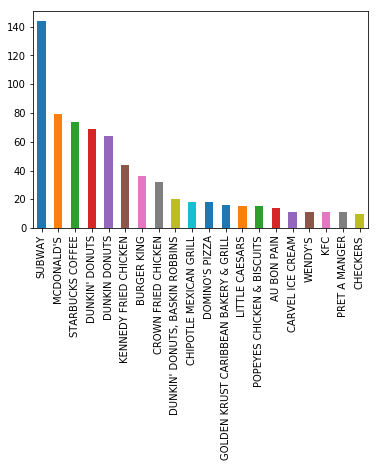

In [7]:
#prints the top 20 popular chains
unique_df['DBA'].value_counts()[0:20].plot(kind='bar')

### Question 5

In [8]:
#calculates fraction of all unique restaurants that are chains
vcount_chain = unique_df['DBA'].value_counts() #number of restaurants for all restaurants
chains_rest = sum(vcount_chain[vcount_chain > 1 ]) #finds which ones are chains
float((chains_rest))/len(unique_df) #number of all the restaurants that are chains (includes multiples)/number of all restaurants

0.16472216729286138

### Question 6

C:\Users\phatp\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


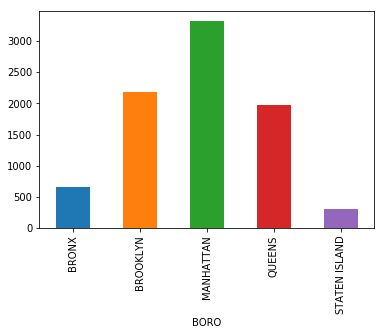

In [9]:
#Plot the number of non-chain restaurants in each borp
mask2 = mask[mask == False] #mask2 gives the restaurants that are not chains
nonchain_list = mask2.keys().values.tolist() #list of the names of the nonchain restaurants
non_chain_df = unique_df[unique_df['DBA'].isin(nonchain_list)] #creates dataframe of those non-chain restaurants
non_chain_df = non_chain_df[unique_df['BORO'] !="Missing"] #returns only rows that don't have missing in boro
non_chain_df.groupby(['BORO']).size().plot(kind="bar") #plots non-chain restaurant counts by boro


### Question 7

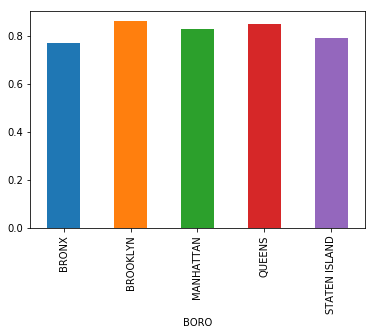

In [10]:
#Plot the fraction of non-chain restaurants in each boro
non_chain_boro = non_chain_df.groupby(['BORO']).size() #counts of the non-chain rest. in each boro
all_rest_boro  = (unique_df[unique_df['BORO'] !="Missing"].groupby(['BORO']).size()) #counts of all rest. in each boro
(non_chain_boro/all_rest_boro).plot(kind='bar') #divide and plot


No, the highest number of independent restaurants is in Manhattan but the highest ratio in Brooklyn.

### Question 8

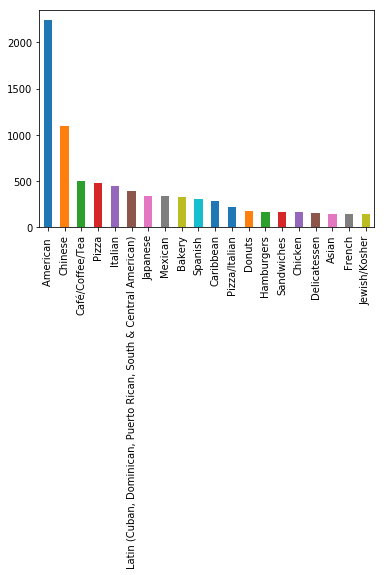

In [11]:
#Plot the popularity of cuisines
unique_df['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind="bar")


### Question 9

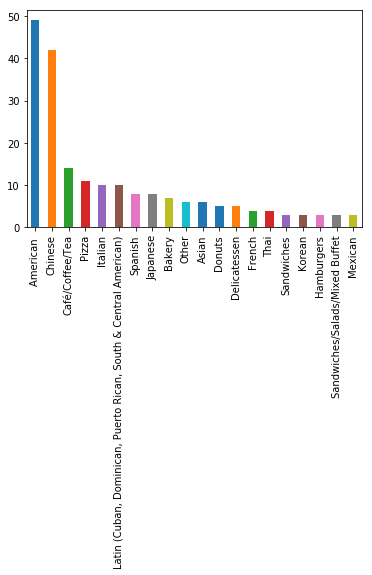

In [12]:
#Plot the cuisines among restaurants which never got cited for violations
no_viol =pd.crosstab( df["RESTAURANTS"],df["VIOLATION CODE"].isnull()) #finds all rests. that received at least one no violation
b = no_viol[no_viol[0]==0] #find all restaurants with no actual violations
c = b[b[1] > 0] #find all rest. where received at least one no violation (this is redundant - line probably not needed)
d = c.index.tolist() #converts the names to a list
clean_df = unique_df[unique_df["RESTAURANTS"].isin(d)] #creates a dataframe of those names
clean_df['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind="bar") #prints out the value counts of the cuisine

### Question 10

In [13]:
#What cuisines tend to be the “cleanest”?

cuisines_20 = (unique_df['CUISINE DESCRIPTION'].value_counts() > 19) #Select all cuisines for which there were at least 20 restaurants representing that cuisine.
cuisines_20 = cuisines_20[cuisines_20 == True] #series of cuisines that have have at least 20 restaurants
c_list = cuisines_20.index.tolist() #convert names of the rest to a list

clean_series = clean_df['CUISINE DESCRIPTION'].value_counts() #number of restaurants that are clean, grouped by cuisine
all_cuisine = unique_df['CUISINE DESCRIPTION'].value_counts() #all restaurants of the cuisines

x = pd.Series() #create new series
for i in c_list: #for each name in the cuisines_20 list
        if i in clean_series.keys(): #if the name is also in the clean list...
            x.set_value(i, float(clean_series[i])/all_cuisine[i]) #compute Q9/Q8
        else: #if not in the clean list...
            x.set_value(i, 0) #set fraction = 0
x.sort_values(ascending = False)[0:10]

C:\Users\phatp\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\phatp\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Barbecue                         0.047619
Continental                      0.047619
Soups & Sandwiches               0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
dtype: float64

### Question 11

In [14]:
#What are the most common violations in each borough?

df = df.replace("Missing",np.nan) #replace missing values with null
boro_viol = pd.crosstab(df["VIOLATION DESCRIPTION"], df["BORO"]) #cross table showing counts of each violation in each boro
boro_viol.idxmax() #most common violations in each boro

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### Question 12

In [15]:
#What are the most common violations per borough, after normalizing for the relative abundance of each violation?

violationFrequency = df["VIOLATION DESCRIPTION"].value_counts() #violation frequency of all violations from original data

normalize = boro_viol.apply(lambda x: x/violationFrequency) #divide the viol freq per boro by the overall freq of the violation

normalize.idxmax() #find the most common violation after normalizing

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

### Question 13

In [16]:
#How many phone area codes correspond to a single zipcode?

unique_df["AREA_CODE"] = unique_df["PHONE"].str[0:3] #extract first 3 numbers from phone and make area code column
area_zip = unique_df[['AREA_CODE', 'ZIPCODE']].drop_duplicates(['AREA_CODE', 'ZIPCODE']) #drop rows of same areacode and zip.
# This keeps one of each number correlating to zip

one_zip = area_zip['AREA_CODE'].value_counts() == 1 #find where an area code only relates to one zip
one_zip = one_zip[one_zip==True]
len(one_zip) #print length

34

### Question 14

In [17]:
#Find common misspellings of street names

unique_df['STREET TYPE'] = unique_df["STREET"].map(lambda x: x.split()[-1]) #get last word of street
unique_df['STREET BASE'] = unique_df["STREET"].map(lambda x: " ".join(x.split()[:-1])) #get rest of street
unique_df["STREET BASE & ZIP"] = unique_df["STREET BASE"] + " " + unique_df["ZIPCODE"]  #combine 2 columns to form 3rd
street_zip_df = unique_df[['STREET TYPE', 'STREET BASE',"STREET BASE & ZIP" ]] #create table of the 3 columns
street_zip_df = street_zip_df.replace("", np.nan) #replace missing values with null
street_zip_df[street_zip_df["STREET BASE"].notnull()] #retrieve all rows where street base is not null

#merge the table with itself on street base & zip
street_zip_df_merge = street_zip_df.merge(street_zip_df, 
                                          left_on= 'STREET BASE & ZIP',
                                         right_on = 'STREET BASE & ZIP')

mask = (street_zip_df_merge['STREET TYPE_x'] != street_zip_df_merge['STREET TYPE_y']) #create a mask of getting rows where street types are not equal
street_zip_df_merge =street_zip_df_merge[mask] #retrieve rows
street_type_cross = pd.crosstab(street_zip_df_merge['STREET TYPE_x'], street_zip_df_merge['STREET TYPE_y']) #cross table of the different street types on the same base
stc_sub = street_type_cross[['AVE','ST','RD','PL','BOULEARD','BULEVARD']] #subset the table for specific columns
stc_sub.idxmax() #print most common per type

STREET TYPE_y
AVE            AVENUE
ST             STREET
RD               ROAD
PL              PLACE
BOULEARD    BOULEVARD
BULEVARD    BOULEVARD
dtype: object